<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/Atv_de_edicoes_de_Classifica%C3%A7%C3%A3o_de_Textos_twitter_com_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [ ]:
!pip install seaborn==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.9/215.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [1]:
import spacy
spacy.__version__

'3.6.1'

In [2]:
# Temporário por problemas no Colab
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [3]:
!python -m spacy download pt

2024-01-02 13:18:02.973935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 13:18:02.973997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 13:18:02.975590: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 13:18:04.981384: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.8 MB/s eta 0:00:00
✔ Download and installation success

In [10]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import bs4 as bs
import urllib.request
import nltk

# Etapa 2: Carregamento da base de dados

In [5]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [13]:

%cd /content/gdrive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/Twitter

!ls

/content/gdrive/.shortcut-targets-by-id/1Rfu_9-UhtoUASY40rYd1YWlPWqFEqcBL/Machine Learning e Data Science com Python de A à Z/Bases de dados/Twitter
Test.csv  Train50.csv


In [14]:
data_dir = "/content/gdrive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/Twitter/Train50.csv"


In [19]:
base_dados = pd.read_table(data_dir, encoding = 'utf-8',sep = ';')

In [20]:
base_dados.shape

(50000, 5)

In [21]:
base_dados.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [22]:
base_dados.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


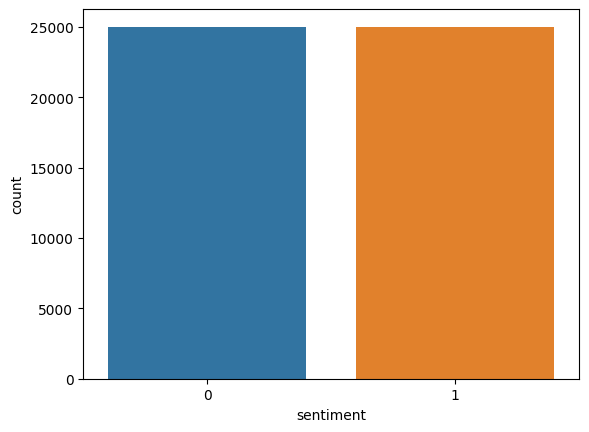

In [24]:
sns.countplot(base_dados, label = 'Contagem',x ='sentiment');

# Etapa 3: Função para pré-processamento dos textos

In [25]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [27]:
print(stop_words)

{'dezassete', 'os', 'sem', 'quinto', 'sabe', 'diz', 'vocês', 'logo', 'numa', 'deste', 'quarta', 'porquanto', 'cada', 'além', 'fez', 'mal', 'eles', 'dão', 'poderá', 'da', 'aí', 'nós', 'sete', 'fostes', 'inclusive', 'mesmo', 'nosso', 'novas', 'quarto', 'somente', 'podem', 'tais', 'meses', 'teve', 'tiveram', 'fazes', 'está', 'apoia', 'contudo', 'nuns', 'pois', 'des', 'dez', 'quê', 'este', 'dezasseis', 'faço', 'vai', 'essas', 'favor', 'isto', 'porque', 'onze', 'estiveste', 'dá', 'adeus', 'breve', 'onde', 'têm', 'que', 'vos', 'mas', 'são', 'cinco', 'cedo', 'estará', 'só', 'esse', 'final', 'teus', 'e', 'tente', 'estiveram', 'teu', 'cujo', 'oitava', 'quer', 'às', 'ainda', 'zero', 'conhecida', 'cuja', 'dizer', 'quanto', 'essa', 'vários', 'seu', 'apoio', 'aqueles', 'fazemos', 'nada', 'isso', 'outra', 'tendes', 'irá', 'te', 'vossos', 'tudo', 'números', 'entre', 'umas', 'coisa', 'parte', 'maior', 'poder', 'geral', 'vão', 'foi', 'quieta', 'relação', 'apontar', 'todos', 'vossa', 'sob', 'área', 'peg

In [28]:
len(stop_words)

416

In [29]:
#pln = spacy.load('pt')
pln = spacy.load("pt_core_news_sm")

In [30]:
pln

In [31]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [32]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [33]:
base_dados.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)
5,1050785368008781825,@KingJokerLeto mas amiga eu to aqui ainda :),Fri Oct 12 16:28:49 +0000 2018,1,:)
6,1050785350724014080,"@RivasJairo Bravo, Jairo!!! :)))",Fri Oct 12 16:28:44 +0000 2018,1,:)
7,1050785336551444480,@inquilinasls @Spotify socorro ksoaksosks acho...,Fri Oct 12 16:28:41 +0000 2018,1,:)
8,1050785297028603905,"@chimekarlla gosto muito de fazenda :) , mas m...",Fri Oct 12 16:28:32 +0000 2018,1,:)
9,1050785215235256320,Amanha vou ver venom :D,Fri Oct 12 16:28:12 +0000 2018,1,:)


In [35]:
base_dados['tweet_text'] = base_dados['tweet_text'].apply(preprocessamento)

In [37]:
base_dados.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@laranjito76 pessoa certo vale azevedo :),Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,@behin_d_curtain precisamente contrário :) vir...,Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,video hoje ... pensar falar meta de o csgo pag...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,Aaaaaaaa amei polaroids expressar to apaixonar...,Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,valorizar coração de o menininho vc diferente ...,Fri Oct 12 16:28:49 +0000 2018,1,:)
5,1050785368008781825,@kingjokerleto amiga to :),Fri Oct 12 16:28:49 +0000 2018,1,:)
6,1050785350724014080,@rivasjairo bravo jairo :))),Fri Oct 12 16:28:44 +0000 2018,1,:)
7,1050785336551444480,@inquilinasls @spotify socorro ksoaksosks acha...,Fri Oct 12 16:28:41 +0000 2018,1,:)
8,1050785297028603905,@chimekarllar gostar fazenda :) morro medo gal...,Fri Oct 12 16:28:32 +0000 2018,1,:)
9,1050785215235256320,amanha venom d,Fri Oct 12 16:28:12 +0000 2018,1,:)


In [ ]:
base_dados=base_dados[['tweet_text','sentiment']]

### Tratamento da classe

In [52]:
base_dados_final = []
for texto, emocao in zip(base_dados['tweet_text'], base_dados['sentiment']):
  #print(texto, emocao)
  if emocao == 0:
    dic = ({'0': True, '1': False})
  elif emocao == 1:
    dic = ({'0': False, '1': True})

  base_dados_final.append([texto, dic.copy()])

In [53]:
len(base_dados_final)

50000

In [56]:
base_dados_final[0]

['@laranjito76 pessoa certo vale azevedo :)', {'0': False, '1': True}]

In [57]:
base_dados_final[0][0]

'@laranjito76 pessoa certo vale azevedo :)'

In [58]:
base_dados_final[0][1]

{'0': False, '1': True}

In [ ]:
type(base_dados_final[0][1])

dict

In [59]:
base_dados_final

[['@laranjito76 pessoa certo vale azevedo :)', {'0': False, '1': True}],
 ['@behin_d_curtain precisamente contrário :) vir chuva vir disposição :)',
  {'0': False, '1': True}],
 ['video hoje ... pensar falar meta de o csgo pagina https://t.co/5rjhknj0oh algu sugestao querer falar de o cenario nacional d',
  {'0': False, '1': True}],
 ['Aaaaaaaa amei polaroids expressar to apaixonar vdd ✨ 💖 🎈r 🎉 🎊 esperar outro pessoa consigar ganhar :) https://t.co/pbip7trcse',
  {'0': False, '1': True}],
 ['valorizar coração de o menininho vc diferente sorrir de isso ❤ ️ — valorizar mundo em o vida diferente :)) https://t.co/5c7wlxqyz9',
  {'0': False, '1': True}],
 ['@kingjokerleto amiga to :)', {'0': False, '1': True}],
 ['@rivasjairo bravo jairo :)))', {'0': False, '1': True}],
 ['@inquilinasls @spotify socorro ksoaksosks achar to em o caixinha som :p',
  {'0': False, '1': True}],
 ['@chimekarllar gostar fazenda :) morro medo galinho kkkkkkk',
  {'0': False, '1': True}],
 ['amanha venom d', {'0': F

# Etapa 5: Criação do classificador

In [60]:
from spacy.training import Example

In [71]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("0")
textcat.add_label("1")
historico = []

In [72]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final,5000):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 1 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.3907768577337265}
{'textcat': 0.04330408410169184}
{'textcat': 0.009131043130764738}
{'textcat': 0.0036478057663771324}
{'textcat': 0.0006336533709259129}


In [73]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [74]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.39077686e+00, 4.33040841e-02, 9.13104313e-03, 3.64780577e-03,
       6.33653371e-04])

Text(0, 0.5, 'Erro')

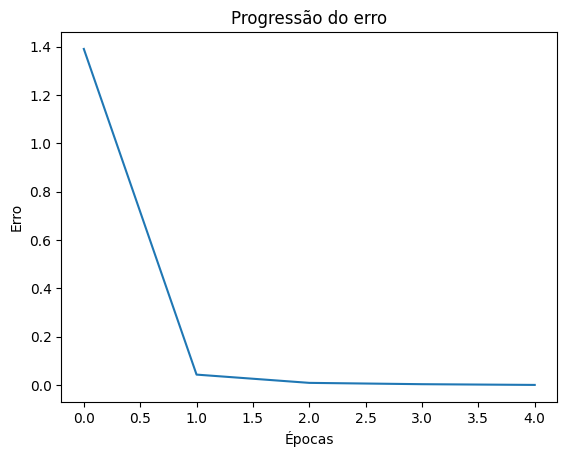

In [75]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [76]:

%cd /content/gdrive/MyDrive

!ls

/content/gdrive/MyDrive
 20200503_192709.mp4
'2.1 - seplan estagio.pdf'
'2.2 - Lucas Morais recibo 2022.08 (Agosto) Outsmarting.pdf'
'2.2 - Lucas Rabelo recibo 2021.09 (setembro) AGENCIA IDEIA.pdf'
'3.6 - Declaração Bolsista - Lucas Rabelo de Araujo Morais (1).pdf'
'3.6 - Declaração Bolsista - Lucas Rabelo de Araujo Morais (2019).pdf'
'4.10 - PG_MAT_EVENTO_MINICURSO.pdf'
'4.10 - R_tidyverse.pdf'
'4.7 - 75_anos_covid_19_trab.pdf'
'4.7 - 75_anos_particip.pdf'
'4.7 - covid_19_cong2021.pdf'
'4.7 - hidreletric_cong_2021.pdf'
'4.7 - particp_cong_2021.pdf'
'4.8 - particip_cong2020.pdf'
'5.1 - Forecasting Paper cin.pdf'
'5.1 - Forecasting Paper.pdf'
'5.2 - Spatial Paper.pdf'
'6.7 - Lucas Rabelo EVENTO (1).pdf'
 Abstract.gdoc
 A-CONQUISTA-DA-MATEMATICA-MP-7_DIVULGACAO.pdf
 Addressing_Minor_Review.gdoc
 AJE-journal-cover-letter-template_Portuguese.gdoc
'Algoritmo Bootstrap tab2-exp.gdoc'
'Análises e resultados da tabela.gdoc'
'Anual-Estado de São Paulo.gsheet'
 Anual-Estado-SP.gsheet
'Apre

In [77]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [78]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [79]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [80]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor de o olho'

In [81]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor de o olho

In [82]:
previsao.cats

{'0': 0.027468686923384666, '1': 0.9725313186645508}

In [87]:
texto_negativo = 'estou com tristeza dele, mas feliz'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'0': 0.9933382272720337, '1': 0.006661799270659685}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [90]:
previsoes = []
i=0
for texto in base_dados['tweet_text']:
  #print(texto)
  previsao = modelo_carregado(texto)
  i+=1
  print(i)
  previsoes.append(previsao.cats)

A saída de streaming foi truncada nas últimas 5000 linhas.
45001
45002
45003
45004
45005
45006
45007
45008
45009
45010
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
45138
45139
45140
45141
45142
45143
45144
45145
45146
45147
45148
45149
45150
45151
45152
45153
45154
45155
45156
45157

In [91]:
previsoes

[{'0': 4.907481525151525e-06, '1': 0.9999951124191284},
 {'0': 5.88887041885755e-06, '1': 0.999994158744812},
 {'0': 5.661961404257454e-05, '1': 0.9999433755874634},
 {'0': 1.2389169569360092e-05, '1': 0.9999876022338867},
 {'0': 2.2069863916840404e-05, '1': 0.9999779462814331},
 {'0': 7.784817171341274e-06, '1': 0.9999922513961792},
 {'0': 1.3543412933358923e-05, '1': 0.9999864101409912},
 {'0': 1.1834039469249547e-05, '1': 0.9999881982803345},
 {'0': 8.876390893419739e-06, '1': 0.9999911785125732},
 {'0': 1.5294264812837355e-05, '1': 0.9999847412109375},
 {'0': 7.512584488722496e-06, '1': 0.9999924898147583},
 {'0': 1.0798829862324055e-05, '1': 0.9999891519546509},
 {'0': 8.437487849732861e-06, '1': 0.9999915361404419},
 {'0': 7.881111741880886e-06, '1': 0.9999921321868896},
 {'0': 2.047886300715618e-05, '1': 0.9999794960021973},
 {'0': 1.3865522305422928e-05, '1': 0.9999861717224121},
 {'0': 5.319037882145494e-06, '1': 0.9999946355819702},
 {'0': 1.2606536074599717e-05, '1': 0.99998

In [92]:
previsoes_final = []
for previsao in previsoes:
  if previsao['0'] > previsao['1']:
    previsoes_final.append('0')
  else:
    previsoes_final.append('1')

previsoes_final = np.array(previsoes_final)

In [93]:
previsoes_final

array(['1', '1', '1', ..., '0', '0', '0'], dtype='<U1')

In [95]:
respostas_reais = base_dados['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0])

In [108]:
respostas_reais_val = [",".join(item) for item in respostas_reais.astype(str)]

In [110]:
respostas_reais_val=np.array(respostas_reais_val)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais_val, previsoes_final)

0.99996

In [113]:
cm = confusion_matrix(respostas_reais_val, previsoes_final)
cm

array([[25000,     0],
       [    2, 24998]])

## Avaliação na base de teste

In [114]:

%cd /content/gdrive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/Twitter

!ls

/content/gdrive/.shortcut-targets-by-id/1Rfu_9-UhtoUASY40rYd1YWlPWqFEqcBL/Machine Learning e Data Science com Python de A à Z/Bases de dados/Twitter
Test.csv  Train50.csv


In [115]:
data_dir = "/content/gdrive/MyDrive/Machine Learning e Data Science com Python de A à Z/Bases de dados/Twitter/Test.csv"


In [119]:
base_dados_teste = pd.read_table(data_dir, encoding = 'utf-8',sep=';')

In [120]:
base_dados_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [121]:
base_dados_teste['tweet_text'] = base_dados_teste['tweet_text'].apply(preprocessamento)

In [122]:
base_dados_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@gazo1a :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@berzgamer pa puta parir :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 confiro em o...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,vcs ajudar galera por o amor butera :) mmvo ih...,Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,casa de o zé morrer sono chegar casa fico sono...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [123]:
previsoes = []
for texto in base_dados_teste['tweet_text']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [124]:
previsoes_final = []
for previsao in previsoes:
  if previsao['0'] > previsao['1']:
    previsoes_final.append('0')
  else:
    previsoes_final.append('1')

previsoes_final = np.array(previsoes_final)

In [125]:
respostas_reais = base_dados_teste['sentiment'].values

In [127]:
respostas_reais_val = [",".join(item) for item in respostas_reais.astype(str)]

In [128]:
respostas_reais_val=np.array(respostas_reais_val)

In [129]:
accuracy_score(respostas_reais_val, previsoes_final)

0.998

In [131]:
cm = confusion_matrix(respostas_reais_val, previsoes_final)
cm

array([[2496,    4],
       [   6, 2494]])